# Homework 2: Perceptrons



This assignment is due on Canvas by **11:59pm on Monday, April 10th**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://canvas.uchicago.edu/courses/49007).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda with Python 3.9. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit this Jupyter notebook **both** as a .ipynb file and a pdf to Canvas.  Do not compress either using tar, rar, zip, etc. 
- Extra credit questions will not make your homework total scores overflow i.e., not exceed 40% in the final grade. But you can use extra credit in one homework to cover another.

**Acknowledgment** : Chris Ketelsen


**Please put your name.**

**Name**: Yujie Jiang

In [2]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

## [100 points] Problem 1 - Perceptron Training

Consider a binary classification problem on the following dataset:

| x1   | x2         | x3      | y| 
|:------:|:------------:| :-----------:|---:|
|0|0|0|-1|
|0|0|1|1|
|0|1|0|1|
|1|0|0|1|
|0|1|1|-1|
|1|1|0|-1|
|1|0|1|-1|
|1|1|1|1|

We are going to experiment with the Perceptron algorithm in this problem.

### Part 1 [10 points]
Complete the `perceptron_train` function and report the results.  
[Note: for this part you should **not** randomly shuffle the order of the data]

In [8]:
# Do not change - unless needed
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])
data = np.transpose(data)
# Initialize the weights and bias (note that we use a non-standard initialization here).
weights = np.array([0, 0.5, 0.5])
bias = 1

[[ 0  0  0 -1]
 [ 0  0  1  1]
 [ 0  1  0  1]
 [ 1  0  0  1]
 [ 0  1  1 -1]
 [ 1  1  0 -1]
 [ 1  0  1 -1]
 [ 1  1  1  1]]


In [32]:
def perceptron_train(data, weights, bias):
    """
    Train a perceptron algorithm and update weights and bias
    :param data (array): data to train model on
    :param weights (array): initial weights
    :param bias (int): initial bias
    
    :type X: array
    :type y: int
    :rtype: weights (array), bias (int), number of mistakes (int)
    """
    mistakes_count = 0
    for row in data:
        X = np.array(row[:3])
        y = row[-1]
        a = np.dot(X, weights)
        if a * y <= 0:
            weights += y * X
            bias += y
            mistakes_count += 1
    return weights, bias, mistakes_count
perceptron_train(data, weights, bias)

(array([ 1. , -0.5,  0.5]), -5, 5)

#### Part 1 A [5 points]
Report the weights, bias, and number of mistakes after the first epoch.

In [36]:
### Do not change or remove this code
weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [ 1.  -0.5  0.5], bias: -6, mistakes: 5


In [37]:
# for grading - ignore

#### Part 1 B [5 points]:
Run the perceptron training for 50 more epochs with the updated weights and report the weights, bias and number of mistakes.

In [39]:
epochs = 50
for i in range(epochs):
    weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [ 1.  -0.5  0.5], bias: -56, mistakes: 5


In [40]:
# for grading - ignore

### Part 2 [10 points] 
Is it possible that your Perceptron classifier would 
ever perfectly classify all training examples after more passes of the Perceptron Algorithm?
Clearly explain your reasoning.

It depends on whether the training examples are linearly seperable or not. If the training samples are clearly seperable by linear line, more passes of the perceptron algorithm can perfectly classify all samples then. However, if the training samples are originally not seperable by linear line, even though there are more passes of perceptron algorithm, there may not be a perfect seperation line. 

### Part 3 [10 points] 
Does the Perceptron classifier necessarily make the same number of mistakes after the first epoch if the data is presented in any other randomized order? 
    Explain your reasoning.

No, the order of how the data is presented will affect the mistakes made after the first epoch. Different orders of data will affect the update of weights, thus affect the number of mistakes made. 

###  Part 4 [45 Points]:  Perceptron Classifier on random generated data

Update the Perceptron Learning Algorithm to explore the convergence on linearly separable simulated data sets with particular properties. Take a look at the `Perceptron` class below.

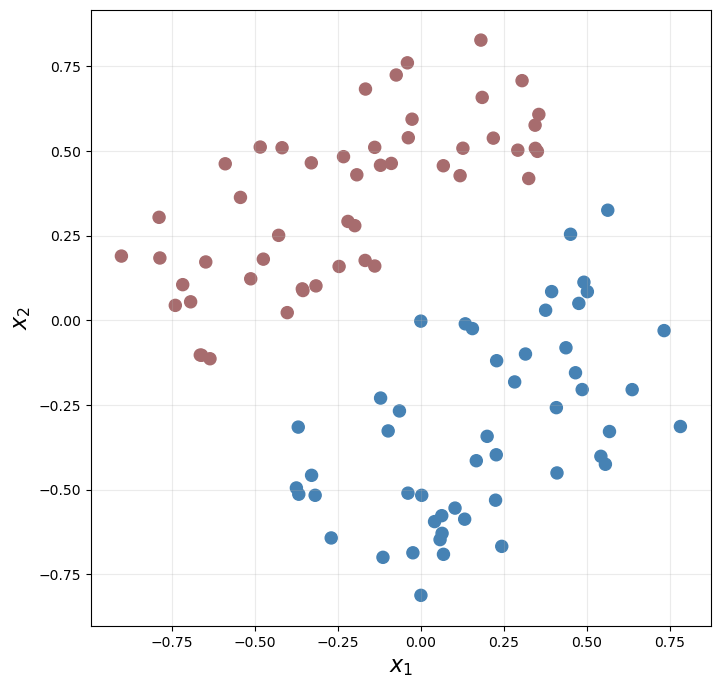

In [80]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data
    """

    def __init__(self, n=100, margin=0.1, X=None, y=None, random_state=1241):
        """
        Initializes Perceptron class.  Generates training data and sets parameters. 

        :param n (int): the number of training examples
        :param margin (float): the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X (array): Input training features.  Only used for unit testing. 
        :param y (array): Input training labels.  Only used for unit testing. 
        """
        # initalize random seed
        np.random.seed(random_state)

        # initialize parameters
        self.n, self.M = n, margin

        # generate random simulated data
        self.X_train, self.y_train = self.gen_data()

        # only used for unit tests
        if X is not None and y is not None:
            self.X_train, self.y_train, self.n = X, y, X.shape[0]

        # initialize weights and bias
        self.w = np.array([1.0, 0.0])
        self.b = 0

        # initialize total mistake counter
        self.num_mistakes = 0

    def train(self, max_epochs=100):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 

        :param max_epochs (int): Maximum number of epochs to perform before stopping.
        """
        for i in range(max_epochs):
            self.w, self.b, self.num_mistakes = perceptron_train(data, weights, bias)

    def plot_model(self, decision_boundary=True):
        """
        Plots the simulated data and the learned decision boundary
        
        :param decision_boundary (bool): whether to plot the decision boundary
        """
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        colors = ["steelblue" if yi == -
                  1 else "#a76c6e" for yi in self.y_train]
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)

        if decision_boundary:
            # 找到这张图上最小的一个x值，及其对应的y值
            # 找到这张图上最大的一个x值，及其对应的y值
            # 把两个点连起来
            pass


        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)

    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1, 1])
        pos_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        pos_x2 = np.random.uniform(
            self.M + flip * 0.1, 1 / np.sqrt(2), int(self.n / 2))
        pos_x2[-1] = self.M + flip * 0.1
        neg_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        neg_x2 = np.random.uniform(-1 / np.sqrt(2), -
                                   self.M + flip * 0.1, int(self.n / 2))
        neg_x2[-1] = -self.M + flip * 0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)),
                            np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array(
            [[np.cos(np.pi / 6), np.sin(np.pi / 6)], [-np.sin(np.pi / 6), np.cos(np.pi / 6)]]))
        y = np.array([+1] * int(self.n / 2) + [-1] * int(self.n / 2))
        rand_order = np.random.choice(
            range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]

percep = Perceptron(n=100, margin=0.1, X=None, y=None, random_state=1241)
percep.plot_model()



#### Part 4 A [10 points]
The `Perceptron` class above has the capability of generating its own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them. Experiment with the `margin` parameter (good values to try are between $0.01$ and $0.4$). Explain what the `margin` parameter is doing.

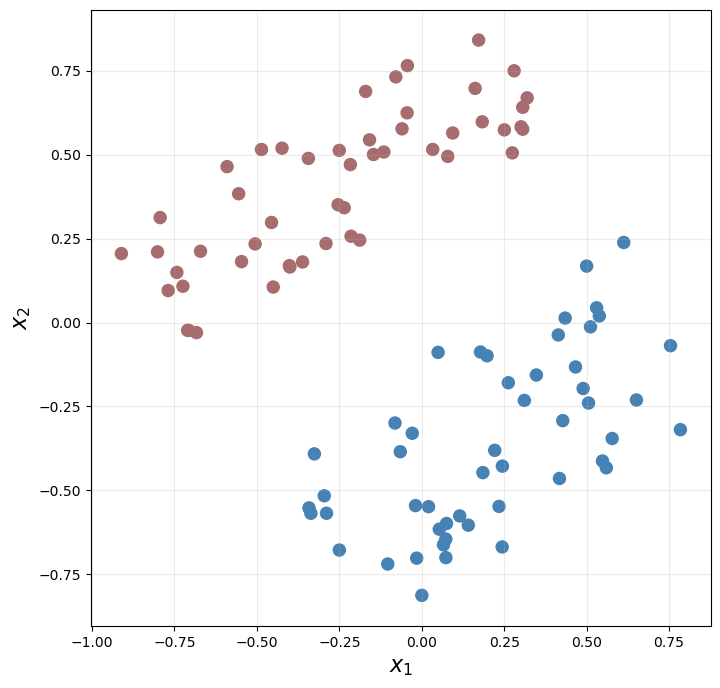

In [81]:
margin = 0.2 # subject to experiment
perc = Perceptron(n=100, margin=margin)
perc.plot_model(decision_boundary=False)

YOUR ANSWER HERE

#### Part 4 B [20 points] 
Modify the `train` method in the `Perceptron` class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should:

- Visit all training examples in a random shuffled order over each training epoch. (**Note:** np.random.shuffle() will be helpful here)
- Terminate when you finish an epoch without making a single classification error or when you hit the maximum number of epochs.
- Use the `self.num_mistakes` counter to count the total number of classification errors over the entire training process. (**Note:** You should also have a seperate counter variable for keeping track of mistakes within each epoch.)


Notes:

You should **not** use Scikit-Learn's Perceptron object in your solution.
It's a good idea to implement a stopping criterion based on the `max_epochs` parameter as the first step. Later we'll look at training sets that will terminate on their own, but implementing a stopping mechanism will save you some pain in the development process.
Do not change the initial guess for the weights and bias. These values were chosen to match the example done in lecture for the unit tests.

In [82]:
from tests import tests
tests.run_test_suite('prob 1.4B', Perceptron)

TestNegMistake (tests.tests.TestPerceptron) ... FAIL
TestPosMistake (tests.tests.TestPerceptron) ... FAIL

FAIL: TestNegMistake (tests.tests.TestPerceptron)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/yujie0706/Machine-Learning-Homework/hw2/tests/tests.py", line 28, in TestNegMistake
    self.assertAlmostEqual(perc.w[0], 0.5)
AssertionError: 1.0 != 0.5 within 7 places (0.5 difference)

FAIL: TestPosMistake (tests.tests.TestPerceptron)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/yujie0706/Machine-Learning-Homework/hw2/tests/tests.py", line 47, in TestPosMistake
    self.assertAlmostEqual(perc.w[0], 0.5)
AssertionError: 1.0 != 0.5 within 7 places (0.5 difference)

----------------------------------------------------------------------
Ran 2 tests in 0.020s

FAILED (failures=2)


AssertionError: one or more tests for prob 1A failed

#### Part 4 C [15 points]
Modify the `plot_model` method so that it plots the learned decision boundary with the training data. Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot. What is the equation of the learned decision boundary? (Use symbols not numbers.)


YOUR ANSWER HERE

In [ ]:
perc = Perceptron(n=100, margin=0.2)
perc.train()
perc.plot_model(decision_boundary=True)

### Part 5 [25 points]

Verify the theorem which states that, if you train a perceptron on linearly separable training data with margin $M > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron algorithm will complete after making at most $1/M^2$ classification mistakes.

Do the following to verify the above statement: 
- Train perceptrons with $n = 100$ and different margins ($M=0.3, 0.1, 0.01, 0.001,$ and $0.0001$).
- Produce a log-log plot with $1/M$ on the horizontal axis and the total numbers of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes.

Usually we run multiple simulations and get an averaged total number of mistakes for each margin, but it is fine if you only do one simulation.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://docs.google.com/forms/d/e/1FAIpQLSdIXy89cVkBdXpUr43ea0FmdIYTIfuDdMY7sItz_GU6Ovjsfg/viewform?usp=sf_link) to solicit your feedback for how to improve the course.